In [1]:
import lib_ar as ar
import numpy as np
import matplotlib.pyplot as plt

Some random numbers using Generator 1:
0.06366307541625857
0.13809990205680706
0.9764936336924583
0.4720861900097943
0.6856023506366308
0.564152791380999
0.6699314397649363
0.545543584720862
0.4603330068560235
0.921645445641528
Some random numbers using Generator 2:
0.03491850314388621
0.9733837983029119
0.7755326292656126
0.6046639399304071
0.8677736401929064
0.3665221903424699
0.6506928758928027
0.19632501068310848
0.2979061107380502
0.40229534216470303
The integral of cos(x) from -pi/2 to pi/2 is approximately 2.
The approximations using the two generators are as follows:
Generator 1: 2.0018883589672782
Generator 2: 1.9998792240574246


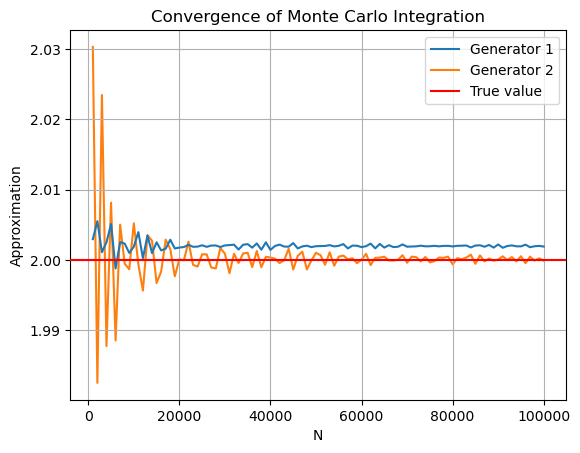

In [2]:
#Q1 and Q2
"""
# Define the MLCG function
def mlcg(a, m, seed=1):
	while True:
		seed = (a * seed) % m
		yield seed / m
#"""
# Create a generator
gen1 = ar.mlcg(a=65, m=1021)
gen2 = ar.mlcg(a=572, m=16381)

# Generate some random numbers
print('Some random numbers using Generator 1:')
for _ in range(10):
	print(next(gen1))
print('Some random numbers using Generator 2:')
for _ in range(10):
	print(next(gen2))

# Define the function to integrate
def f(x):
	return np.cos(x)
"""
# Monte Carlo integration
def monte_carlo_integration(f, a, b, n, gen):
	sum = 0.0
	for _ in range(n):
		x = a + (b - a) * next(gen)  # Scale the random number to the interval [a, b]
		sum += f(x)
	return (b - a) * sum / n
#"""
# Parameters for the integral
a = -np.pi / 2
b = np.pi / 2

# Calculate and plot the approximations
approximations1 = []
approximations2 = []

for n in range(1000, 100001, 1000):
	approximation = ar.monte_carlo_integration(f, a, b, n, gen1)
	approximations1.append(approximation)
for n in range(1000, 100001, 1000):
	approximation = ar.monte_carlo_integration(f, a, b, n, gen2)
	approximations2.append(approximation)

#Function to integrate
print('The integral of cos(x) from -pi/2 to pi/2 is approximately 2.')
print('The approximations using the two generators are as follows:')
print('Generator 1:', approximations1[-1])
print('Generator 2:', approximations2[-1])
	
# Plot the approximations
plt.plot(range(1000, 100001, 1000), approximations1, label='Generator 1', zorder = 2)
plt.plot(range(1000, 100001, 1000), approximations2, label='Generator 2', zorder = 1)
plt.axhline(y=2, color='r', linestyle='-', label='True value', zorder = 10)
plt.xlabel('N')
plt.ylabel('Approximation')
plt.title('Convergence of Monte Carlo Integration')
plt.legend()
plt.grid()
plt.show()

The histograms show that the accept/reject method is more efficient than the inverse transform method.


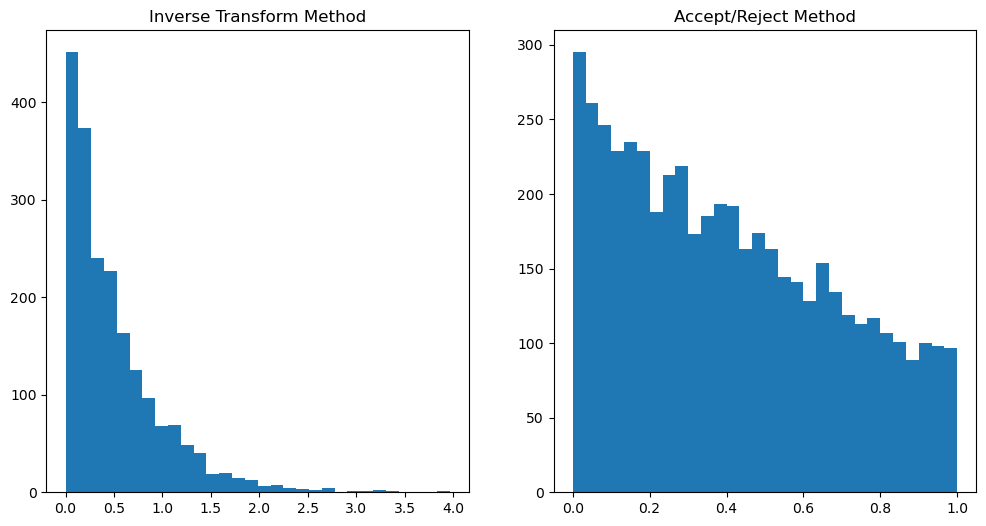

In [3]:
#Q3

# Define the target distribution and its inverse CDF
def p(x):
    return np.exp(-2 * x)

def inverse_cdf_p(y):
    return -0.5 * np.log(1 - y)

# Define the sampling distribution and its maximum value
def q(x):
    return 2 - x

max_q = 2

# Generate random numbers using the inverse transform method
inverse_transform_samples = inverse_cdf_p(np.random.uniform(0, 1, 2000))

# Generate random numbers using the accept/reject method
accept_reject_samples = []
while len(accept_reject_samples) < 5000:
    x = np.random.uniform(0, 1)
    u = np.random.uniform(0, max_q)
    if u <= p(x) / q(x):
        accept_reject_samples.append(x)

# Plot the histograms
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.hist(inverse_transform_samples, bins=30, density=False)
plt.title('Inverse Transform Method')

plt.subplot(1, 2, 2)
plt.hist(accept_reject_samples, bins=30, density=False)
plt.title('Accept/Reject Method')

print('The histograms show that the accept/reject method is more efficient than the inverse transform method.')
plt.show()

In [4]:
#Q4

# Define the function to integrate
def f(x):
    return np.exp(-2 * x) / (1 + x**2)

# Define the importance sampling functions and their inverse CDFs
def p1(x):
    return 0.5

def inverse_cdf_p1(y):
    return 2 * y

def p2(x):
    return np.exp(-x)

def inverse_cdf_p2(y):
    return -np.log(1 - y)

def p3(x):
    return np.exp(-x / 2) / (2 * (1 - np.exp(-1)))

def inverse_cdf_p3(y):
    return -2 * np.log(1 - y * (1 - np.exp(-1)))
"""
# Monte Carlo integration with importance sampling
def monte_carlo_importance_sampling(f, p, inverse_cdf_p, n):
    samples = inverse_cdf_p(np.random.uniform(0, 1, n))
    weights = f(samples) / p(samples)
    return np.mean(weights), np.var(weights)
"""
# Calculate the approximations and variances
n = 10000
approximation_p1, variance_p1 = ar.monte_carlo_importance_sampling(f, p1, inverse_cdf_p1, n)
approximation_p2, variance_p2 = ar.monte_carlo_importance_sampling(f, p2, inverse_cdf_p2, n)
approximation_p3, variance_p3 = ar.monte_carlo_importance_sampling(f, p3, inverse_cdf_p3, n)

#print the function to be integrated
print('\n The integral of exp(-2x)/(1+x^2) from 0 to infinity is approximately 0.39767. \n')

# Print the results
print(f"Approximation with p1: {approximation_p1}, Variance: {variance_p1}")
print(f"Approximation with p2: {approximation_p2}, Variance: {variance_p2}")
print(f"Approximation with p3: {approximation_p3}, Variance: {variance_p3}")

print('\n The importance sampling method with p3 is the most efficient. \n')


 The integral of exp(-2x)/(1+x^2) from 0 to infinity is approximately 0.39767. 

Approximation with p1: 0.39233085114799404, Variance: 0.2664395204525275
Approximation with p2: 0.3977297502797162, Variance: 0.10388568621964075
Approximation with p3: 0.40222074383274486, Variance: 0.14353684291820945

 The importance sampling method with p3 is the most efficient. 



In Monte Carlo integration, the basic idea is to use random sampling to estimate the value of an integral. However, the precision of this estimate depends on the number of samples: the more samples, the more precise the estimate. But generating more samples can be computationally expensive.

Variance reduction techniques aim to improve the precision of the Monte Carlo estimate without increasing the number of samples. They do this by changing the way samples are generated to reduce the variance (spread) of the estimated integral values.

Importance sampling is one such variance reduction technique. It involves changing the probability distribution of the random variables to more closely match the function being integrated. This can significantly reduce the variance of the estimate, especially for functions that have high values in a small region of the integration domain.

Here, the variance reduction has been achieved by carefully choosing the importance sampling functions p1, p2, and p3. The function that best matches the shape and range of the integrand will provide the greatest variance reduction.

For example, if the integrand has high values in a small region, an importance sampling function that gives more weight to that region will reduce the variance of the estimate. Conversely, if the importance sampling function does not match the integrand well, the variance reduction may be minimal.